In [1]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import ConfusionMatrixDisplay
import statsmodels.api as sm
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import RocCurveDisplay

warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:

# Load dataset
data = pd.read_csv("divorce_data.csv", delimiter=";")

# Display basic information
display(data.shape)
display(data.head())
display(data.info())
display(data.describe())

# Check for missing values
print("\nMissing values in the dataset:")
display(data.isnull().sum())


(170, 55)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Q1       170 non-null    int64
 1   Q2       170 non-null    int64
 2   Q3       170 non-null    int64
 3   Q4       170 non-null    int64
 4   Q5       170 non-null    int64
 5   Q6       170 non-null    int64
 6   Q7       170 non-null    int64
 7   Q8       170 non-null    int64
 8   Q9       170 non-null    int64
 9   Q10      170 non-null    int64
 10  Q11      170 non-null    int64
 11  Q12      170 non-null    int64
 12  Q13      170 non-null    int64
 13  Q14      170 non-null    int64
 14  Q15      170 non-null    int64
 15  Q16      170 non-null    int64
 16  Q17      170 non-null    int64
 17  Q18      170 non-null    int64
 18  Q19      170 non-null    int64
 19  Q20      170 non-null    int64
 20  Q21      170 non-null    int64
 21  Q22      170 non-null    int64
 22  Q23      170 non-null    i

None

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000



Missing values in the dataset:


Q1         0
Q2         0
Q3         0
Q4         0
Q5         0
Q6         0
Q7         0
Q8         0
Q9         0
Q10        0
Q11        0
Q12        0
Q13        0
Q14        0
Q15        0
Q16        0
Q17        0
Q18        0
Q19        0
Q20        0
Q21        0
Q22        0
Q23        0
Q24        0
Q25        0
Q26        0
Q27        0
Q28        0
Q29        0
Q30        0
Q31        0
Q32        0
Q33        0
Q34        0
Q35        0
Q36        0
Q37        0
Q38        0
Q39        0
Q40        0
Q41        0
Q42        0
Q43        0
Q44        0
Q45        0
Q46        0
Q47        0
Q48        0
Q49        0
Q50        0
Q51        0
Q52        0
Q53        0
Q54        0
Divorce    0
dtype: int64

In [3]:

# Identify categorical and numerical features
categoricals = data.select_dtypes(include=['object']).columns.tolist()
numericals = data.select_dtypes(include=['int64', 'float64']).columns.to_list()
print(categoricals, numericals)


[] ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41', 'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49', 'Q50', 'Q51', 'Q52', 'Q53', 'Q54', 'Divorce']


In [4]:

def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

data = remove_outliers_iqr(data, numericals)
display(data.shape)
display(data.head())


(157, 55)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1
5,0,0,1,0,0,2,0,0,0,1,...,2,2,1,2,1,1,1,2,0,1
7,2,1,2,2,2,1,0,3,3,2,...,0,1,2,2,2,1,1,1,0,1


In [5]:

# Define features and target
X = data.drop(columns=['Divorce'])
y = data['Divorce']

# Feature Selection
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

mi_scores = mutual_info_classif(X_train, y_train)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

top_features = mi_series.head(30).index  
X_selected = X[top_features]
print("Top Features from Mutual Information:\n", top_features)


Top Features from Mutual Information:
 Index(['Q40', 'Q16', 'Q20', 'Q18', 'Q15', 'Q9', 'Q11', 'Q36', 'Q17', 'Q26',
       'Q39', 'Q38', 'Q5', 'Q30', 'Q19', 'Q8', 'Q44', 'Q4', 'Q14', 'Q25',
       'Q41', 'Q1', 'Q12', 'Q27', 'Q2', 'Q28', 'Q22', 'Q21', 'Q34', 'Q29'],
      dtype='object')


In [6]:

# Backward Elimination
X_const = sm.add_constant(X) 
model = sm.OLS(y, X_const).fit()

while True:
    p_values = model.pvalues[1:]
    max_p = p_values.max()
    if max_p > 0.05:
        worst_feature = p_values.idxmax()
        X_const.drop(columns=[worst_feature], inplace=True)
        model = sm.OLS(y, X_const).fit()
    else:
        break

selected_features_backward = X_const.columns[1:]
print("\nFinal Selected Features (Backward Elimination):\n", selected_features_backward)



Final Selected Features (Backward Elimination):
 Index(['Q3', 'Q6', 'Q12', 'Q14', 'Q17', 'Q22', 'Q23', 'Q26', 'Q27', 'Q28',
       'Q31', 'Q35', 'Q40', 'Q46', 'Q47', 'Q48', 'Q49', 'Q52'],
      dtype='object')


In [7]:

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X[selected_features_backward], y, test_size=0.4, random_state=42)

# Preprocessing
data[numericals] = scaler.fit_transform(data[numericals])


In [8]:

# Logistic Regression Model
logreg_model = LogisticRegression(max_iter=2000, random_state=32)
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_test)


In [9]:

def evaluate_model(name, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f"{name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\n")

evaluate_model("Logistic Regression", y_test, logreg_pred)


Logistic Regression Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
ROC-AUC: 1.0000
Confusion Matrix:
[[34  0]
 [ 0 29]]




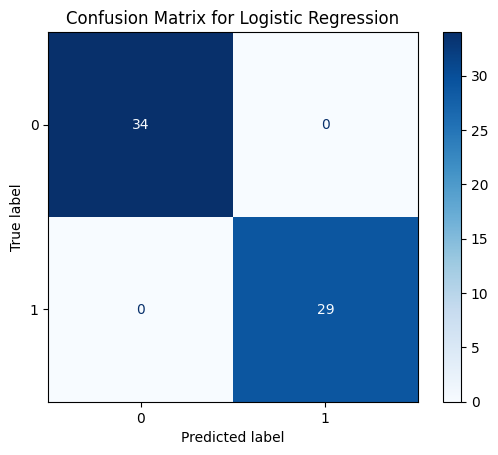

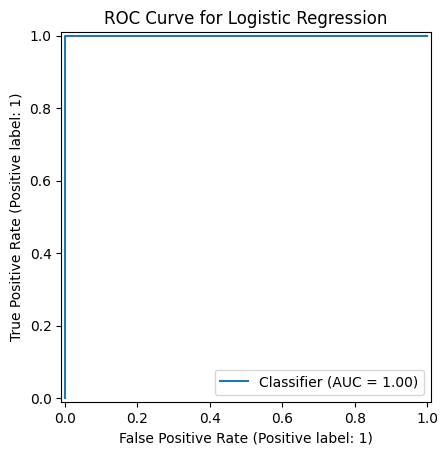

In [10]:

# Plot Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, logreg_pred, cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

# Plot ROC Curve
RocCurveDisplay.from_predictions(y_test, logreg_pred)
plt.title("ROC Curve for Logistic Regression")
plt.show()
